# <center>LINIEAR REGRESSION FROM SCRATCH</center>

### Important Librareis

In [1]:
import matplotlib.pyplot as plt
#from numba import jit

### Read training data

In [2]:
data= open('ex1data1.txt',)
train_x,train_y = [], []
for line in data:
    x,y = map(float,line.strip().split(','))
    train_x.append(x)
    train_y.append(y)

### Loss function

In [3]:
#@jit(nopython = True)
def compute_cost(train_x, train_y, weight, bias):
    m = len(train_y)
    for j in range(0,m):
        x = train_x[j]
        y = train_y[j]
        guess  = weight * x + bias
        error  = (1/m) * (y - guess)**2
    return error

### Gradient Descent function(SGD Optimizer)

In [4]:
#@jit(nopython = True)
def stochastic_gradient_descent(train_x, train_y, weight, bias, iter):
    m = len(train_y)
    loss_history = []
    for i in range(0, iter):
        for j in range(0, m):
            x = train_x[j]
            y = train_y[j]
            guess = weight * x + bias
            error = y - guess
            weight = weight + (2/m) * learning_rate * error * x
            bias   = bias   + (2/m) * learning_rate * error
        loss_history.append(compute_cost(train_x, train_y, weight, bias))
    return weight, bias, loss_history

### Parameters

In [5]:
weight = 0.0 # Initial weight
bias = 0.0# Initial bias

### Hyperparameter

In [6]:
learning_rate = 0.000001
iter = 30000000

### Training the model

In [7]:
weight, bias, loss_history = stochastic_gradient_descent(train_x, train_y, weight, bias, iter)

### Calculating best fit

In [8]:
m = len(train_y) # Number of training example
result = []
for i in range(m):
    result.append(train_x[i]*weight + bias)

### Plot the best fit

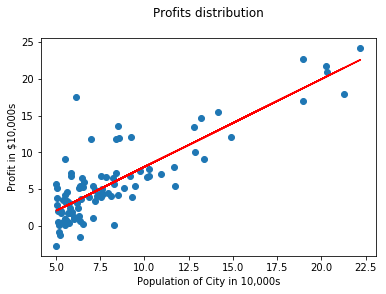

In [9]:
plt.scatter(train_x, train_y)
plt.plot(train_x, result, c = 'r')
#plt.plot(train_x, predicted_train_y, color='b', linewidth=1)
plt.title('Profits distribution',y = 1.07)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Loss History

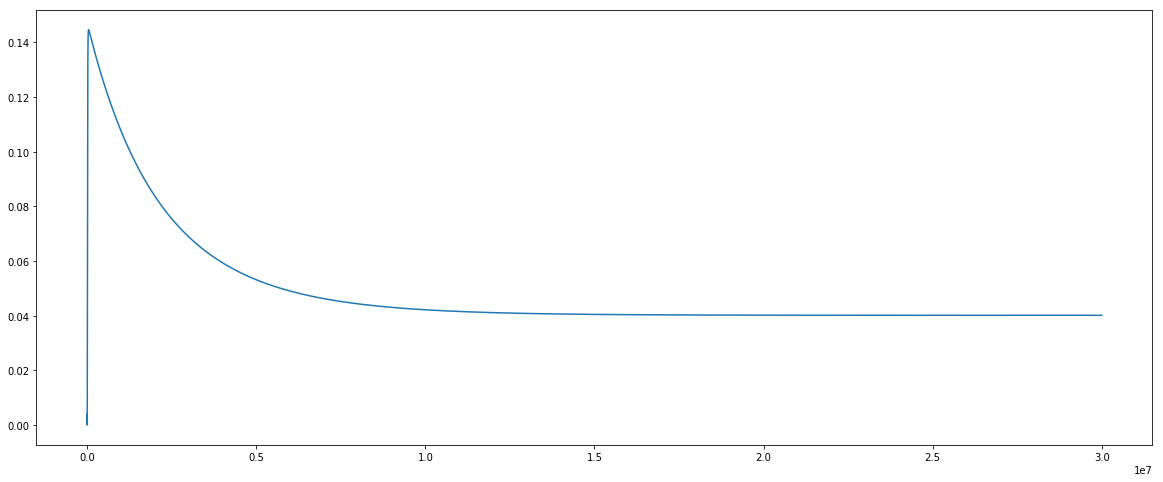

In [11]:
plt.figure(figsize = (20,8))
plt.plot(loss_history)
plt.show()

In [17]:
print(weight, bias)

1.1930163631219288 -3.895690268681383


### Prediction

In [18]:
#For population = 35,000s, we predict a profit of 2798.36876352
print(1*bias*10000 + 3.5 * weight*10000)

#For population = 70,000s, we predict a profit of 44554.54631015       
print(1*bias*10000 + 7 * weight*10000)

2798.670022453676
44554.242731721184


### Visualising Contour and Gradient Function

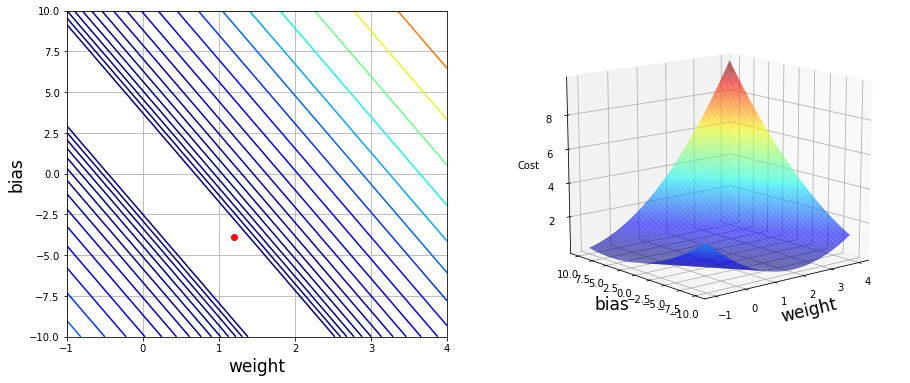

In [19]:
from mpl_toolkits.mplot3d import axes3d
# Create grid coordinates for plotting
B0 = np.linspace(-1, 4, 50)
B1 = np.linspace(-10, 10, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = compute_cost(train_x, train_y, xx[i,j], yy[i,j])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

CS = ax1.contour(xx, yy, Z, np.logspace(-1, 1, 20), cmap=plt.cm.jet)

# Left plot
ax1.scatter(weight,bias, c='r')
ax1.grid(True)

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)
# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel('weight', fontsize=17)
    ax.set_ylabel('bias', fontsize=17)